<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np 
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

pd.set_option('display.max_columns', None)

import time
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# загрузим датасеты
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')  # обучающая выборка
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')  # тестовая выборка
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')  # исходные данные

In [3]:
# создадим список всех датасетов
all_data = [train, test, full]
# изучим инфо по каждому датасету
for df in all_data:
    display(df.head())
    display(df.info())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

In [4]:
# заменим тип данных в колонке date с object на datetime
for df in all_data:
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    
# проверим изменения
for df in all_data:
    display(df.dtypes.iloc[:1])

date    datetime64[ns]
dtype: object

date    datetime64[ns]
dtype: object

date    datetime64[ns]
dtype: object

In [5]:
# проверим на явные дубликаты
for df in all_data:
    display(df.duplicated().sum())

0

0

0

In [6]:
# так как по условию задачи соседние по времени параметры часто похожи, заполним пропуски методом ffill 
# который будет использовать ближайшуюю сверху величину для заполнения последующего пропуска
train = train.ffill(axis=0)
test = test.ffill(axis=0)
full = full.ffill(axis=0)

После просмотра информации по датасетам были выявлены проблемы:
- Колонка date не верный тип данных (был заменен на datetime)
- Пропуски в данных (были заполнены методом ffill)

Явных дубликатов не обнаружено

In [7]:
# проверим, что эффективность обогащения рассчитана правильно
C = train['rougher.output.concentrate_au']  # доля золота в концентрате после флотации/очистки
F = train['rougher.input.feed_au']  # доля золота в сырье/концентрате до флотации/очистки
T = train['rougher.output.tail_au']  # доля золота в отвальных хвостах после флотации/очистки
RECOVERY = ((C*(F-T))/(F*(C-T))) * 100  # формула рассчета эффективности обогащения

# выведем MAE между нашими расчётами и значением признака rougher.output.recovery
print('MAE :', mean_absolute_error(train['rougher.output.recovery'], RECOVERY))

MAE : 9.73512347450521e-15


Значение MAE 9.73e-15, это очень малое значение показывающие среднее отклонение наших расчетов от признака. Следовательно можем сделать вывод, что эффективность обогащения рассчитана правильно.

In [8]:
# проанализируем признаки, недоступные в тестовой выборке
missed_columns = set(train.columns) - set(test.columns)

# выведем список признаков которые отсутствуют в тестовой выборке
missed_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

По условию задачи в тестовой выборке отсутствуют признаки которые замеряются и/или рассчитываются значительно позже. Как мы можем заметить в эти признаки входят целевые (эффективность обогащения чернового концентрата - rougher.output.recovery, эффективность обогащения финального концентрата - final.output.recovery), а так же ряд признаков которые являются выходными результатами после каждого технологического этапа.

In [9]:
# добавим в тестовую выборку целевые признаки для дальнейшей проверки качества моделей
test = test.merge(full.loc[:, ['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

In [10]:
# колонка с датой нам больше не пригодится, удалим ее в тренировочной и тестовой выборках
train = train.drop('date', axis=1)
test = test.drop('date', axis=1)

## Анализ данных

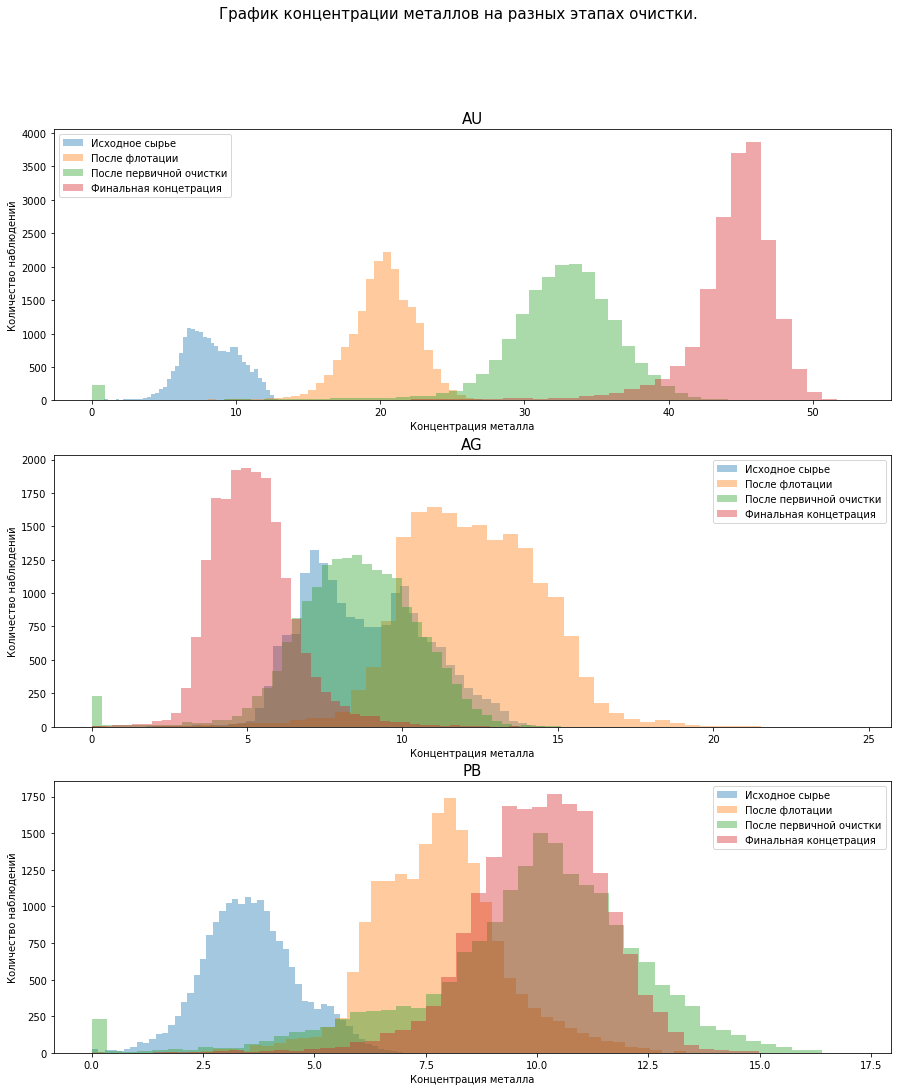

In [28]:
# исследуем концентрации металлов на разных стадиях обработки
position = 0
plt.figure(figsize=[15, 17])
plt.suptitle('График концентрации металлов на разных этапах очистки.', fontsize=15)
for metal in ['au', 'ag', 'pb']:
    position += 1
    plt.subplot(3, 1, position)
    plt.title(f'{str(metal).upper()}', fontsize=15)
    sns.distplot(full[f'rougher.input.feed_{metal}'], label='Исходное сырье', kde=False)
    sns.distplot(full[f'rougher.output.concentrate_{metal}'], label='После флотации', kde=False)
    sns.distplot(full[f'primary_cleaner.output.concentrate_{metal}'], label='После первичной очистки', kde=False)
    sns.distplot(full[f'final.output.concentrate_{metal}'], label='Финальная концетрация', kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show()

По графикам можно сделать вывод что концентрация золота постепенно растет с каждым технологическим этапом. Серебро имеет максимальную концентрацию после флотации и минимальную на финальной стадии (меньше чем в исходном сырье). Концентрация свинца постепенно растет и на 2х последних этапах имеет примерно одинаковые показатели.

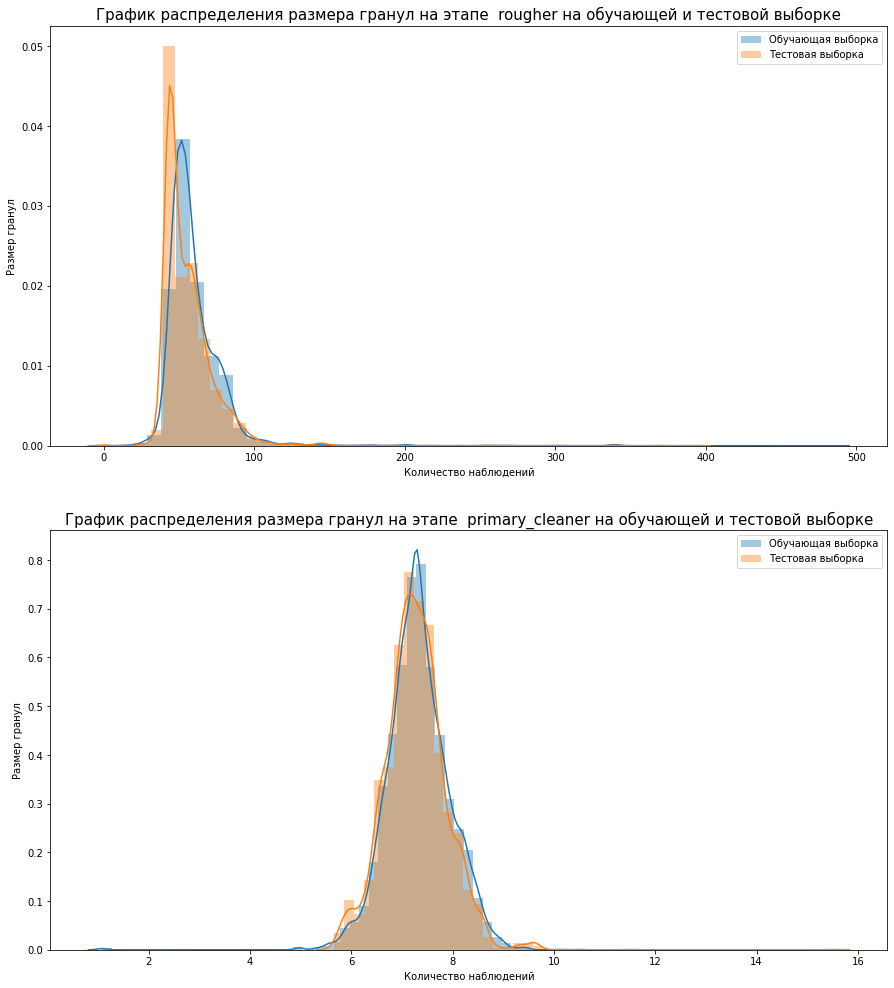

In [29]:
# исследуем распределение размера гранул на этапах rougher и primary_cleaner в train и test выборках
position = 0
plt.figure(figsize=[15, 17])
for stage in ['rougher', 'primary_cleaner']:
    position += 1
    plt.subplot(2, 1, position)
    plt.title(f'График распределения размера гранул на этапе  {stage} на обучающей и тестовой выборке', fontsize=15)
    sns.distplot(train[f'{stage}.input.feed_size'], label='Обучающая выборка')
    sns.distplot(test[f'{stage}.input.feed_size'], label='Тестовая выборка')
    plt.xlabel('Количество наблюдений')
    plt.ylabel('Размер гранул')
    plt.legend()
plt.show()

Размер гранул существенно не различается между тестовой и тренировочной выборками. Также мы видим что на этапе primary_cleaner размер гранул имеет максимальные значения в раоне 0.8 в то время как на этапе флотации размер гранул не превышал значения 0.05.

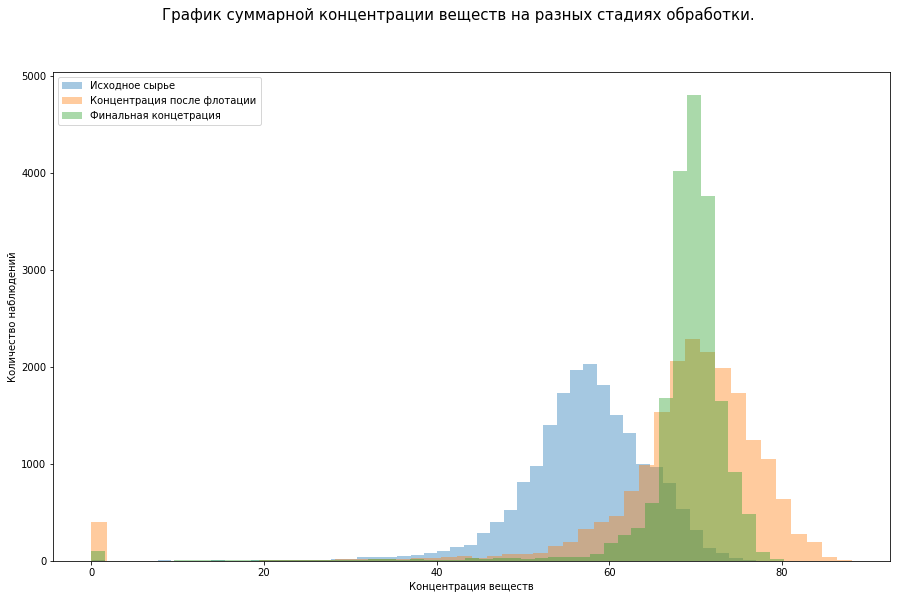

In [13]:
# исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах
sum_concentrate_of_rougher_input = 0
sum_concentrate_of_rougher_output = 0
sum_concentrate_of_primary_cleaner_output = 0
sum_concentrate_of_final_output = 0
for metal in ['au', 'ag', 'pb', 'sol']:
    sum_concentrate_of_rougher_input += full[f'rougher.input.feed_{metal}']
    sum_concentrate_of_rougher_output += full[f'rougher.output.concentrate_{metal}']
    sum_concentrate_of_final_output += full[f'final.output.concentrate_{metal}']
    
    
plt.figure(figsize=[15, 9])
plt.suptitle('График суммарной концентрации веществ на разных стадиях обработки.', fontsize=15)
sns.distplot(sum_concentrate_of_rougher_input, label='Исходное сырье', kde=False)
sns.distplot(sum_concentrate_of_rougher_output, label='Концентрация после флотации', kde=False)
sns.distplot(sum_concentrate_of_final_output, label='Финальная концетрация',kde=False)
plt.xlabel('Концентрация веществ')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

К финальному этапу концентрация веществ в большей части наблюдений увеличивается и имеет похожую концентрацию с этапом после флотации но меньший разброс значений.

На графиках распределения веществ есть значения равные нулю. Будем считать их аномальными и удалим.

In [14]:
# удаляем нулевые значения в выборке train
train = train.loc[(train['rougher.output.concentrate_au'] != 0) & (train['rougher.output.concentrate_ag'] != 0) & (train['rougher.output.concentrate_pb'] != 0) & (train['rougher.output.concentrate_sol'] != 0)]
train = train.loc[(train['final.output.concentrate_au'] != 0) & (train['final.output.concentrate_ag'] != 0) & (train['final.output.concentrate_pb'] != 0) & (train['final.output.concentrate_sol'] != 0)]

# удаляем нулевые значения в выборке full
full = full.loc[(full['rougher.output.concentrate_au'] != 0) & (full['rougher.output.concentrate_ag'] != 0) & (full['rougher.output.concentrate_pb'] != 0) & (full['rougher.output.concentrate_sol'] != 0)]
full = full.loc[(full['final.output.concentrate_au'] != 0) & (full['final.output.concentrate_ag'] != 0) & (full['final.output.concentrate_pb'] != 0) & (full['final.output.concentrate_sol'] != 0)]

## Модель

In [15]:
# разделим тестовую и обучающую выборки на признаки и таргеты
# обучающая выборка
X_train = train.drop(missed_columns, axis=1)
y_rougher_train = train['rougher.output.recovery'] 
y_final_train = train['final.output.recovery']

# тестовая выборка
X_test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_rougher_test = test['rougher.output.recovery'] 
y_final_test = test['final.output.recovery']

In [16]:
# посмотрим на размер получившихся выборок
display(f'Размер train: {X_train.shape[0]} строк, {X_train.shape[1]} столбца')
display(f'Размер таргета rougher_train: {y_rougher_train.shape[0]} строк')
display(f'Размер таргета final_train: {y_final_train.shape[0]} строк')
display('='*40)
display(f'Размер test: {X_test.shape[0]} строк, {X_test.shape[1]} столбца')
display(f'Размер таргета rougher_test: {y_rougher_test.shape[0]} строк')
display(f'Размер таргета final_test: {y_final_test.shape[0]} строк')

'Размер train: 13792 строк, 52 столбца'

'Размер таргета rougher_train: 13792 строк'

'Размер таргета final_train: 13792 строк'

'========================================'

'Размер test: 5290 строк, 52 столбца'

'Размер таргета rougher_test: 5290 строк'

'Размер таргета final_test: 5290 строк'

In [17]:
# создадим функцию для подсчета sMAPE
def get_sMAPE(target, predict):
    sMAPE = (1/len(target))*np.sum((np.abs(target-predict))/((np.abs(target)+np.abs(predict))/2))*100
    return sMAPE

In [18]:
# создадим функцию для подсчета финального sMAPE 
def get_final_sMAPE(rougher_sMAPE, final_sMAPE):
    finally_sMAPE = 0.25 * rougher_sMAPE + 0.75 * final_sMAPE
    return finally_sMAPE

In [19]:
# добавим свою метрику для cross_val_score
sMAPE_scorer = make_scorer(get_sMAPE)

In [20]:
# LinearRegression посчитаем sMAPE на тренировочной выборке с использованием кросс валидации
LR_rougher = LinearRegression()
sMAPE_rougher = cross_val_score(LR_rougher, X_train, y_rougher_train, scoring=sMAPE_scorer, cv=5)
sMAPE_rougher = sMAPE_rougher.mean()


LR_final = LinearRegression()
sMAPE_final = cross_val_score(LR_final, X_train, y_final_train, scoring=sMAPE_scorer, cv=5)
sMAPE_final = sMAPE_final.mean()

finally_sMAPE_LR = get_final_sMAPE(sMAPE_rougher, sMAPE_final)

display(f'sMAPE rougher: {sMAPE_rougher}')
display(f'sMAPE final: {sMAPE_final}')
display(f'sMAPE итоговое: {finally_sMAPE_LR}')

'sMAPE rougher: 7.2725301489217005'

'sMAPE final: 10.988171875003161'

'sMAPE итоговое: 10.059261443482796'

In [23]:
# DecisionTreeRegressor посчитаем sMAPE на тренировочной выборке с использованием кросс валидации
# и подберем лучший пораметр для max_depth
state = RandomState(12345)

best_sMAPE_rougher = 100
best_depth_rougher = 0
for depth in tqdm(range(1, 11, 1)):
    DTR_rougher = DecisionTreeRegressor(max_depth=depth, random_state=state)
    sMAPE_rougher = cross_val_score(DTR_rougher, X_train, y_rougher_train, scoring=sMAPE_scorer, cv=5)
    sMAPE_rougher = sMAPE_rougher.mean()
    
    if sMAPE_rougher < best_sMAPE_rougher:
        best_sMAPE_rougher = sMAPE_rougher
        best_depth_rougher = depth

    
best_sMAPE_final = 100
best_depth_final = 0
for depth in tqdm(range(1, 11, 1)):    
    DTR_final = DecisionTreeRegressor(max_depth=depth, random_state=state)
    sMAPE_final = cross_val_score(DTR_final, X_train, y_final_train, scoring=sMAPE_scorer, cv=5)
    sMAPE_final = sMAPE_final.mean()
    
    if sMAPE_final < best_sMAPE_final:
        best_sMAPE_final = sMAPE_final
        best_depth_final = depth
    
    
finally_sMAPE_DTR = get_final_sMAPE(best_sMAPE_rougher, best_sMAPE_final)


display(f'Лучшее значение параметра max_depth для этапа rougher: {best_depth_rougher}')
display(f'Лучшее значение параметра max_depth для этапа final: {best_depth_final}')
display('-'*70)
display(f'sMAPE rougher: {best_sMAPE_rougher}')
display(f'sMAPE final: {best_sMAPE_final}')
display(f'sMAPE итоговое: {finally_sMAPE_DTR}')

100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


'Лучшее значение параметра max_depth для этапа rougher: 3'

'Лучшее значение параметра max_depth для этапа final: 2'

'----------------------------------------------------------------------'

'sMAPE rougher: 7.355656304525764'

'sMAPE final: 9.38291370298173'

'sMAPE итоговое: 8.876099353367739'

In [24]:
# RandomForestRegressor посчитаем sMAPE на тренировочной выборке с использованием кросс валидации
# и подберем лучшие пораметры для max_depth и n_estimators

best_sMAPE_rougher_RFR = 100
best_depth_rougher_RFR = 0
best_n_estimators_rougher_RFR = 0
for est in tqdm(range(20, 101, 20)):
    for depth in tqdm(range(2, 11, 2)):
        RFR_rougher = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=state)
        sMAPE_rougher = cross_val_score(RFR_rougher, X_train, y_rougher_train, scoring=sMAPE_scorer, cv=5)
        sMAPE_rougher = sMAPE_rougher.mean()
        
        if sMAPE_rougher < best_sMAPE_rougher_RFR:
            best_sMAPE_rougher_RFR = sMAPE_rougher
            best_depth_rougher_RFR = depth
            best_n_estimators_rougher_RFR = est


best_sMAPE_final_RFR = 100
best_depth_final_RFR = 0
best_n_estimators_final_RFR = 0
for est in tqdm(range(20, 101, 20)):
    for depth in tqdm(range(2, 11, 2)):        
        RFR_final = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=state)
        sMAPE_final = cross_val_score(RFR_final, X_train, y_final_train, scoring=sMAPE_scorer, cv=5)
        sMAPE_final = sMAPE_final.mean()
        
        if sMAPE_final < best_sMAPE_final_RFR:
            best_sMAPE_final_RFR = sMAPE_final
            best_depth_final_RFR = depth
            best_n_estimators_final_RFR = est


finally_sMAPE_RFR = get_final_sMAPE(best_sMAPE_rougher_RFR, best_sMAPE_final_RFR)
        
            
display(f'Лучшее значение параметра max_depth для этапа rougher: {best_depth_rougher_RFR}')
display(f'Лучшее значение параметра n_estimators  для этапа rougher: {best_n_estimators_rougher_RFR}')
display('-'*70)
display(f'Лучшее значение параметра max_depth для этапа final: {best_depth_final_RFR}')
display(f'Лучшее значение параметра n_estimators  для этапа final: {best_n_estimators_final_RFR}')
display('-'*70)
display(f'sMAPE rougher: {best_sMAPE_rougher_RFR}')
display(f'sMAPE final: {best_sMAPE_final_RFR}')
display(f'sMAPE итоговое: {finally_sMAPE_RFR}')

100%|██████████| 5/5 [22:27<00:00, 269.45s/it]


'Лучшее значение параметра max_depth для этапа rougher: 4'

'Лучшее значение параметра n_estimators  для этапа rougher: 40'

'----------------------------------------------------------------------'

'Лучшее значение параметра max_depth для этапа final: 4'

'Лучшее значение параметра n_estimators  для этапа final: 60'

'----------------------------------------------------------------------'

'sMAPE rougher: 6.715883533471169'

'sMAPE final: 9.143140387695066'

'sMAPE итоговое: 8.536326174139091'

In [25]:
# выведем на экран таблицу с итоговыми sMAPE для проверенных моделей
models = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor']
sMAPE_table = pd.DataFrame(np.array([finally_sMAPE_LR, finally_sMAPE_DTR, finally_sMAPE_RFR]), index=models)
sMAPE_table.set_axis(['Итоговое sMAPE'], axis='columns', inplace=True)
sMAPE_table

,Итоговое sMAPE
LinearRegression,10.059261
DecisionTreeRegressor,8.876099
RandomForestRegressor,8.536326


Лучший результат показала модель RandomForestRegressor: 8.536326 (оценки взяты по среднему показателю при кросс валидации). Проверим RandomForestRegressor на тестовых данных.

In [26]:
# проверим модель RandomForestRegressor на тестовых данных, лучшие параметры:
# для rougher n_estimators=40, max_depth=4 для final n_estimators=60, max_depth=4
RFR_rougher = RandomForestRegressor(n_estimators=40, max_depth=4, random_state=state)
RFR_rougher.fit(X_train, y_rougher_train)
predict_rougher = RFR_rougher.predict(X_test)

RFR_final = RandomForestRegressor(n_estimators=60, max_depth=4, random_state=state)
RFR_final.fit(X_train, y_final_train)
predict_final = RFR_final.predict(X_test)

sMAPE_rougher = get_sMAPE(y_rougher_test, predict_rougher)
sMAPE_final = get_sMAPE(y_final_test, predict_final)
finally_sMAPE = get_final_sMAPE(sMAPE_rougher, sMAPE_final)


display(f'sMAPE rougher: {sMAPE_rougher}')
display(f'sMAPE final: {sMAPE_final}')
display(f'sMAPE итоговое: {finally_sMAPE}')

'sMAPE rougher: 8.463679368737496'

'sMAPE final: 9.659740507778372'

'sMAPE итоговое: 9.360725223018152'

In [27]:
# для проверки адекватности проведем тест на константной моделе
dummy_rougher = DummyRegressor(strategy='mean')
dummy_rougher.fit(X_train, y_rougher_train)
dummy_predict_rougher = dummy_rougher.predict(X_test)

dummy_final = DummyRegressor(strategy='mean')
dummy_final.fit(X_train, y_final_train)
dummy_predict_final = dummy_final.predict(X_test)

sMAPE_rougher = get_sMAPE(y_rougher_test, dummy_predict_rougher)
sMAPE_final = get_sMAPE(y_final_test, dummy_predict_final)
finally_sMAPE = get_final_sMAPE(sMAPE_rougher, sMAPE_final)

display(f'sMAPE rougher: {sMAPE_rougher}')
display(f'sMAPE final: {sMAPE_final}')
display(f'sMAPE итоговое: {finally_sMAPE}')

'sMAPE rougher: 9.066150363733703'

'sMAPE final: 10.073241067849125'

'sMAPE итоговое: 9.82146839182027'

Наша лучшая модель показала sMAPE: 9.360725223018152 а константная: 9.82146839182027, разница в 0.5, считаю полученную модель адекватной.

Вывод:

В этом проэкте мы поработали с данными по восстановлению золота из золотосодержащей руды. На этапе обработки данных были выполнены следующие действия:
- Проверено, что эффективность обогащения рассчитана правильно. Мы вычислите её на обучающей выборке для признака rougher.output.recovery. Нашли MAE между нашими расчётами и значением признака. MAE: MAE 9.73e-15
-  Проанализированы признаки, недоступные в тестовой выборке. В эти признаки входят целевые (эффективность обогащения чернового концентрата - rougher.output.recovery, эффективность обогащения финального концентрата - final.output.recovery), а так же ряд признаков которые являются выходными результатами после каждого технологического этапа.
- Проверили данные на явные дубликаты.
- Заполнили пропуски соседними значениями (по условию задачи).
- Перевели колонки с датой в формат datetime.
- Восстановили целевые признаки в тестовой выборке из full датасета.


На этапе анализа данных:
- Исследовали концентрации металлов на разных этапах обработки (По графикам можно сделать вывод что концентрация золота постепенно растет с каждым технологическим этапом. Серебро имеет максимальную концентрацию после флотации и минимальную на финальной стадии (меньше чем в исходном сырье). Концентрация свинца постепенно растет и на 2х последних этапах имеет примерно одинаковые показатели.)
- Исследовали распределение размеров гранул в тестовой и обучающей выборках на этапах rougher и primary_cleaner (Размер гранул существенно не различается между тестовой и тренировочной выборками. Также мы видим что на этапе primary_cleaner размер гранул имеет максимальные значения в раоне 0.8 в то время как на этапе флотации размер гранул не превышал значения 0.05.)
- Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах(К финальному этапу концентрация веществ в большей части наблюдений увеличивается и имеет похожую концентрацию с этапом после флотации но меньший разброс значений.)


На этапе Обучения и проверки модели:
- Разделили выборки на параметры и таргет.
- Создали функции расчета sMAPE и итогового sMAPE.
- Получили резулитаты итогового sMAPE на тестовых данных (с учетом подбора лучших гиперпараметров):
    - LinearRegression:	10.059261
    - DecisionTreeRegressor:	8.876099
    - RandomForestRegressor:	8.536326
- Получи результат итогового sMAPE для модели RandomForestRegressor с параметрами для rougher: max_depth-4, n_estimators-40, для final: max_depth-4, n_estimators-60, для тестовой выборки.
    - sMAPE итоговое: 9.360725223018152
- Для проверки адекватности лучший модели сравниле результат полученый на RandomForestRegressor с константной моделью из библиотеки sclearn:
    - sMAPE итоговое: 9.82146839182027
    
    
Наша модель успешно прошла проверку и показала результат превосходящий константную модель на 0.5%
